In [45]:
import torch
from torch import nn

print(torch.__version__)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

2.6.0+cu124
cuda


In [46]:
!nvidia-smi


Mon May  5 07:45:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             11W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [21]:
import gdown
import zipfile
import os

file_url = 'https://drive.google.com/uc?id=1iNJpbR5LSsOUBZ-MYeavqJyRBMjSC8yg'
file_name = 'eye_dataset.zip'

# Download the file from Google Drive
gdown.download(file_url, file_name, quiet=False)
extract_dir = './dataset'

# Extract the zip file
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Remove the zip file after extraction
os.remove(file_name)
print("Files extracted successfully to:", extract_dir)

Downloading...
From (original): https://drive.google.com/uc?id=1iNJpbR5LSsOUBZ-MYeavqJyRBMjSC8yg
From (redirected): https://drive.google.com/uc?id=1iNJpbR5LSsOUBZ-MYeavqJyRBMjSC8yg&confirm=t&uuid=61fcfeb0-ec0d-4b92-987b-0b17fd7dc514
To: /content/eye_dataset.zip
100%|██████████| 217M/217M [00:03<00:00, 57.2MB/s]


Files extracted successfully to: ./dataset


In [22]:
from pathlib import Path
import os

# Setup path to data folder
image_path = Path("/content/dataset/Eye_Diseases")

def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 2 directories and 0 images in '/content/dataset/Eye_Diseases'.
There are 6 directories and 0 images in '/content/dataset/Eye_Diseases/train'.
There are 0 directories and 2052 images in '/content/dataset/Eye_Diseases/train/cataract'.
There are 0 directories and 2008 images in '/content/dataset/Eye_Diseases/train/myopia'.
There are 0 directories and 2101 images in '/content/dataset/Eye_Diseases/train/normal'.
There are 0 directories and 1858 images in '/content/dataset/Eye_Diseases/train/amd'.
There are 0 directories and 1985 images in '/content/dataset/Eye_Diseases/train/noneye'.
There are 0 directories and 2016 images in '/content/dataset/Eye_Diseases/train/glucoma'.
There are 6 directories and 0 images in '/content/dataset/Eye_Diseases/test'.
There are 0 directories and 200 images in '/content/dataset/Eye_Diseases/test/cataract'.
There are 0 directories and 200 images in '/content/dataset/Eye_Diseases/test/myopia'.
There are 0 directories and 200 images in '/content/dataset/

Random image path: /content/dataset/Eye_Diseases/train/cataract/aug_0_3632.jpg
Image Class: cataract
Image Height: 224
Image Width: 224


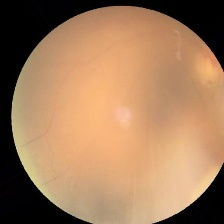

In [23]:
import random
from PIL import Image

# random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))
# print(len(image_path_list))
random_image_path = random.choice(image_path_list)
# print(random_image_path)
# the image class is the name of the directory where iamges resides
image_class = random_image_path.parent.stem
# print(image_class)

img = Image.open(random_image_path)

# Print metadata
print(f'Random image path: {random_image_path}')
print(f'Image Class: {image_class}')
print(f'Image Height: {img.height}')
print(f'Image Width: {img.width}')
img

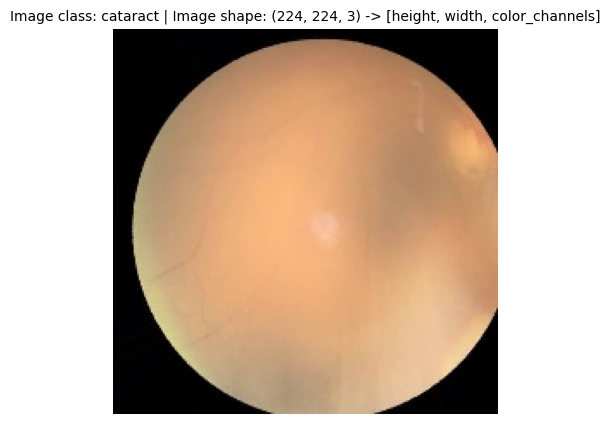

In [24]:
# Visualizing using matplotliib
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
fig = plt.figure(figsize=(6, 5))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]", fontsize = 10)
plt.axis(False)
plt.show()

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)
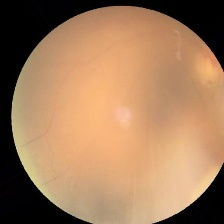

In [25]:
img_as_array

In [26]:
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms

print(torchvision.__version__)

# Transform image
data_transform = transforms.Compose([
    # Resize our images to 224x224
    # transforms.Resize(size = (224, 224)),
    transforms.ToTensor()
])


transformed_data = data_transform(img)
transformed_data, transformed_data.shape, transformed_data.dtype

0.21.0+cu124


(tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
          [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
          [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
          [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
          [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ...,

In [27]:
# Setup train and test paths
train_dir = 'dataset/Eye_Diseases/train'
test_dir = 'dataset/Eye_Diseases/test'

train_dir, test_dir

('dataset/Eye_Diseases/train', 'dataset/Eye_Diseases/test')

In [28]:
train_data = datasets.ImageFolder(root = train_dir,
                                  transform = data_transform, # Transforms input data into tensors
                                  target_transform = None)  # Transform labels into none

test_data = datasets.ImageFolder(root = test_dir,
                                 transform = data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 12020
     Root location: dataset/Eye_Diseases/train
     StandardTransform
 Transform: Compose(
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 1200
     Root location: dataset/Eye_Diseases/test
     StandardTransform
 Transform: Compose(
                ToTensor()
            ))

In [29]:
# Get class names as lists
class_names = train_data.classes
class_names

['amd', 'cataract', 'glucoma', 'myopia', 'noneye', 'normal']

In [30]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'amd': 0, 'cataract': 1, 'glucoma': 2, 'myopia': 3, 'noneye': 4, 'normal': 5}

In [31]:
train_data.samples[:12000:2000]

[('dataset/Eye_Diseases/train/amd/102_left.jpg', 0),
 ('dataset/Eye_Diseases/train/cataract/2139_right.jpg', 1),
 ('dataset/Eye_Diseases/train/glucoma/1269_right.jpg', 2),
 ('dataset/Eye_Diseases/train/myopia/1543_right.jpg', 3),
 ('dataset/Eye_Diseases/train/noneye/067.jpg', 4),
 ('dataset/Eye_Diseases/train/normal/2365_left.jpg', 5)]

In [32]:
# Index on the train_data Dataset to get a single iamge and label
img, label = train_data[0][0], train_data[0][1]

img, img.dtype, label, type(label), class_names[label]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 torch.float32,
 0,
 int,
 'amd')

In [33]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)
img.shape, img_permute.shape

(torch.Size([3, 224, 224]), torch.Size([224, 224, 3]))

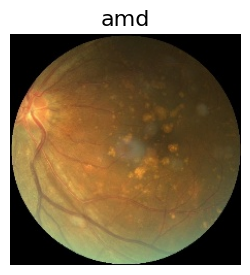

In [34]:
# Plot the image
plt.figure(figsize = (3, 3))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize = 16);

In [35]:
# Train and test dataloaders
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              num_workers = 1,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             num_workers = 1,
                             shuffle = False)

len(train_dataloader), len(test_dataloader)

(376, 38)

In [36]:
img, label = next(iter(train_dataloader))

img.shape, label.shape     # {img.shape} -> [batch_size, color_channels, height, width]

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [41]:
import torch.nn as nn

In [47]:
class ImprovedTinyVGGModel(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super(ImprovedTinyVGGModel, self).__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(input_shape, hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.BatchNorm2d(hidden_units),
            nn.Dropout(0.2)  # Dropout for regularization
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, 4 * hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(4 * hidden_units, 4 * hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.BatchNorm2d(4 * hidden_units),
            # nn.Dropout(0.2)
        )
        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(4 * hidden_units, 4 * hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(4 * hidden_units, 2 * hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.BatchNorm2d(2 * hidden_units),
            nn.Dropout(0.2)
        )
        self.conv_block_4 = nn.Sequential(
            nn.Conv2d(2 * hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, output_shape, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.BatchNorm2d(output_shape),
            # nn.Dropout(0.2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1176, hidden_units),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden_units, output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.conv_block_3(x)
        x = self.conv_block_4(x)
        x = self.classifier(x)
        return x

In [48]:
# Install torchinfo, import if it's available
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

In [49]:
from torchinfo import summary

# Instance of Improved TinyVGG
model = ImprovedTinyVGGModel(3, 48, len(class_names)).to(device)   # (input_shape, hidden_units, output_shape)
summary(model, input_size = [1, 3, 224, 224])

Layer (type:depth-idx)                   Output Shape              Param #
ImprovedTinyVGGModel                     [1, 6]                    --
├─Sequential: 1-1                        [1, 48, 112, 112]         --
│    └─Conv2d: 2-1                       [1, 48, 224, 224]         1,344
│    └─ReLU: 2-2                         [1, 48, 224, 224]         --
│    └─Conv2d: 2-3                       [1, 48, 224, 224]         20,784
│    └─ReLU: 2-4                         [1, 48, 224, 224]         --
│    └─MaxPool2d: 2-5                    [1, 48, 112, 112]         --
│    └─BatchNorm2d: 2-6                  [1, 48, 112, 112]         96
│    └─Dropout: 2-7                      [1, 48, 112, 112]         --
├─Sequential: 1-2                        [1, 192, 56, 56]          --
│    └─Conv2d: 2-8                       [1, 192, 112, 112]        83,136
│    └─ReLU: 2-9                         [1, 192, 112, 112]        --
│    └─Conv2d: 2-10                      [1, 192, 112, 112]        331,968

In [50]:
# Trying forward pass to check the model
model(img.to(device))

tensor([[-0.2251,  0.1677,  0.2252, -0.0583, -0.1190, -0.2305],
        [-0.5529, -0.3860, -0.0629,  0.4019,  0.3244, -0.0967],
        [-0.0201, -0.5587, -0.0753,  0.3959, -0.1301, -0.5812],
        [-0.2517, -0.0939,  0.0212, -0.0307, -0.5358, -0.4662],
        [-0.1025,  0.3537,  0.0447,  0.0075, -0.0728, -0.3172],
        [-0.2849, -1.1698,  0.0699, -1.0263, -0.3686, -1.0449],
        [-0.3772, -0.3292, -0.0086, -0.4531, -0.0967, -0.4406],
        [-0.1790,  0.1920,  0.0871, -0.1564, -0.0746, -0.0480],
        [ 0.0152,  0.1231,  0.3205,  0.2514,  0.0845, -0.3773],
        [-0.5933, -0.0651, -0.2704,  0.1631,  0.0312,  0.0027],
        [ 0.1886, -0.3503,  0.1581,  0.3731,  0.0953, -0.0449],
        [-0.4321,  0.9865,  0.3445,  0.7022, -0.8397,  0.5091],
        [ 0.8135, -0.5328,  0.3368,  0.6443,  0.5824, -0.1978],
        [-0.3330, -0.0334,  0.1046,  0.0702,  0.2810,  0.2153],
        [-0.1275,  0.0647,  0.3058,  0.1906,  0.3685, -0.2263],
        [-0.3823, -0.5340, -0.2282, -0.4

In [51]:
def train_step(model, dataloader, loss_fn, optimizer):
    model.train()
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model, dataloader, loss_fn):
    model.eval()
    test_loss, test_acc = 0, 0

    # Turn on inference
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [52]:
from tqdm.auto import tqdm

def train(model, train_dataloader, test_dataloader, optimizer, loss_fn, epochs):

  # Create a empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss":[],
             "test_acc": []}

  # Loop through training and testing steps for no of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model = model,
                                       dataloader = train_dataloader,
                                       optimizer = optimizer,
                                       loss_fn = loss_fn)

    test_loss, test_acc = test_step(model = model,
                                     dataloader = test_dataloader,
                                     loss_fn = loss_fn)

    print(f'Epoch: {epoch} | Train loss: {train_loss:.4f} - Train acc: {(train_acc*100):.2f}% -  Test loss: {test_loss:.4f} - Test acc: {(test_acc*100):.2f}%')

    # Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

In [53]:
# Setup loss functions and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr=0.001)

In [114]:
# Set random seed
# torch.manual_seed(42)
EPOCHS = 50

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model
model_results = train(model = model,
                      train_dataloader = train_dataloader,
                      test_dataloader = test_dataloader,
                      optimizer = optimizer,
                      loss_fn = loss_fn,
                      epochs = EPOCHS)

# End the timer and print duration of training
end_time = timer()
print(f'Total Train Time: {end_time - start_time:.3f} seconds')

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1058 - Train acc: 56.21% -  Test loss: 1.0560 - Test acc: 59.46%
Epoch: 1 | Train loss: 0.9784 - Train acc: 62.35% -  Test loss: 1.2296 - Test acc: 53.45%
Epoch: 2 | Train loss: 0.8818 - Train acc: 66.82% -  Test loss: 0.7522 - Test acc: 72.04%
Epoch: 3 | Train loss: 0.8167 - Train acc: 69.77% -  Test loss: 1.2307 - Test acc: 55.59%
Epoch: 4 | Train loss: 0.7611 - Train acc: 72.11% -  Test loss: 0.7120 - Test acc: 72.29%
Epoch: 5 | Train loss: 0.7394 - Train acc: 73.16% -  Test loss: 0.6142 - Test acc: 77.55%
Epoch: 6 | Train loss: 0.7174 - Train acc: 74.14% -  Test loss: 0.6843 - Test acc: 73.77%
Epoch: 7 | Train loss: 0.6801 - Train acc: 75.20% -  Test loss: 0.5455 - Test acc: 80.10%
Epoch: 8 | Train loss: 0.6572 - Train acc: 75.67% -  Test loss: 0.5170 - Test acc: 80.43%
Epoch: 9 | Train loss: 0.6490 - Train acc: 76.02% -  Test loss: 0.5432 - Test acc: 79.52%
Epoch: 10 | Train loss: 0.6419 - Train acc: 76.75% -  Test loss: 0.5203 - Test acc: 81.00%
Epoch: 11

In [54]:
# Get the model key results
model_results.keys()

NameError: name 'model_results' is not defined

In [55]:
def plot_loss_curves(results):
    """ Plots training curves of a results dictionary """

    # Get results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    epochs = range(len(results['train_loss']))

    plt.figure(figsize=(15, 4))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

In [56]:
from pathlib import Path

MODEL_PATH = Path()
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save path
MODEL_NAME = "MultipleEyeDiseaseDetectModel.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
# torch.save(obj=model.state_dict(),
#            f=MODEL_SAVE_PATH)

Saving model to: MultipleEyeDiseaseDetectModel.pth


In [57]:
loaded_model = ImprovedTinyVGGModel(3, 48, 6).to('cpu')
# Load the model with map_location set to 'cpu'
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH, map_location=torch.device('cpu')))

print(f"Loaded model:\n{loaded_model}")
print(f"Model on device:\n{next(loaded_model.parameters()).device}")

Loaded model:
ImprovedTinyVGGModel(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.2, inplace=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(48, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(192, 

In [58]:
def make_predictions(model, data, device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim = 0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [59]:
import random
# random.seed(42)

test_samples = []
test_labels = []
# test_targets_tensor = torch.tensor(test_data.targets)
for sample, label in random.sample(list(test_data), k = 20):
  test_samples.append(sample)
  test_labels.append(label)

In [60]:
test_samples[0].shape

torch.Size([3, 224, 224])

In [61]:
loaded_pred_probs = make_predictions(loaded_model,
                                     test_samples,
                                     device)

loaded_pred_classes = loaded_pred_probs.argmax(dim = 1)

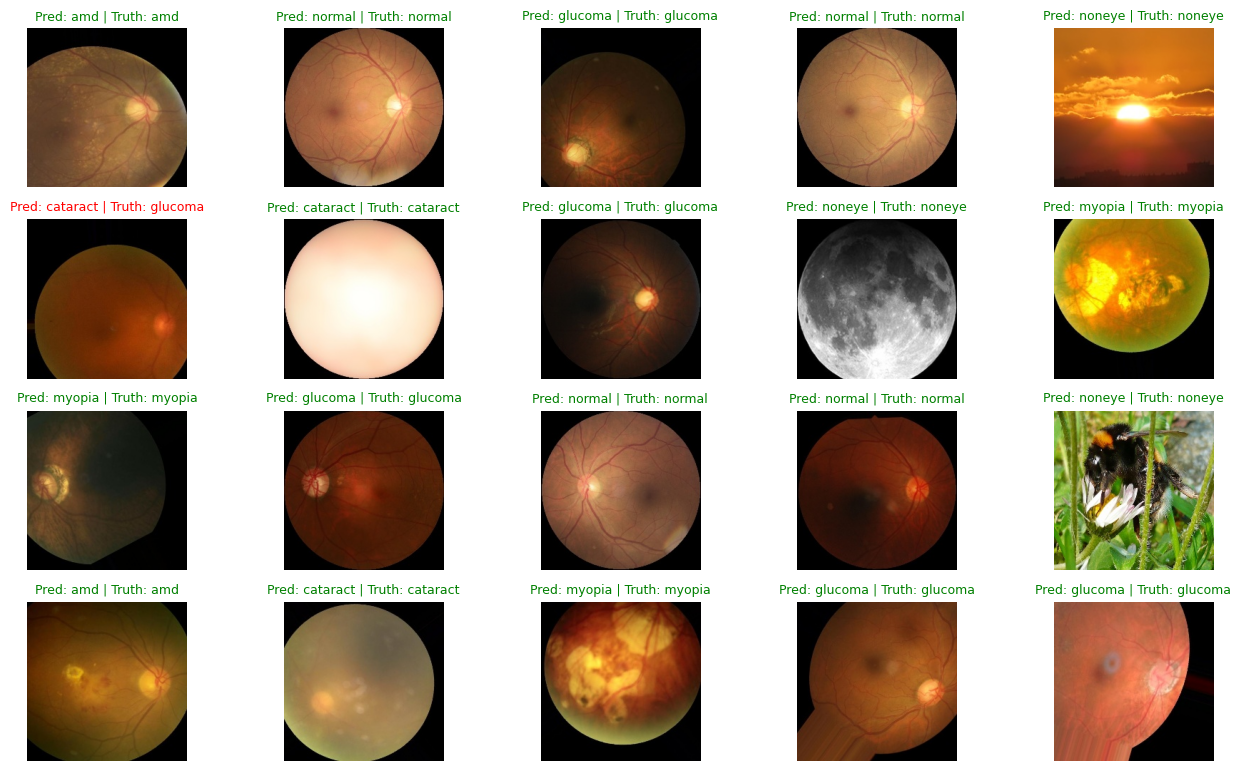

In [65]:
plt.figure(figsize=(16, 12))
nrows, ncols = 5, 5

for i, sample in enumerate(test_samples):
  class_name = np.array(['amd', 'cataract', 'glucoma', 'myopia', 'noneye', 'normal'])
  plt.subplot(nrows, ncols, i + 1)
  normalized_sample = sample.permute(1, 2, 0).numpy()
  # normalized_sample = normalized_sample / 255.0
  plt.imshow(normalized_sample)

  pred_label = class_name[loaded_pred_classes[i]]
  truth_label = class_name[test_labels[i]]
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
      plt.title(title_text, fontsize=9, c="g")
  else:
      plt.title(title_text, fontsize=9, c="r")

  plt.axis(False);

In [63]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.0 MB/s eta 0:00:00


In [66]:
import gradio as gr
from PIL import Image
import numpy as np

# Assuming your make_predictions and loaded_model are already defined
def predict_image_class(image):
    # Perform image transformation
    transformed_image = data_transform(image)

    # Define class names
    class_name = np.array(['amd', 'cataract', 'glucoma', 'myopia', 'noneye', 'normal'])

    # Make predictions
    loaded_pred_probs = make_predictions(loaded_model, [transformed_image], device)

    # Convert prediction probabilities to percentages
    pred_probs_percent = (loaded_pred_probs.squeeze().detach().cpu().numpy() * 100).round(2)

    # Find the class with the maximum probability
    max_prob_idx = pred_probs_percent.argmax()

    # Format the output, highlighting the class with the highest probability
    output = ""
    for i, class_prob in enumerate(pred_probs_percent):
        if i == max_prob_idx:
            output += f"{class_name[i]}: {class_prob}%\n"  # Highlight max probability
        else:
            output += f"{class_name[i]}: {class_prob}%\n"

    return output

# Create Gradio interface
image_input = gr.Image(type="pil")  # Input for the image
text_output = gr.Textbox(label="Class Probabilities")  # Output for the class probabilities

# Launch Gradio interface
gr.Interface(fn=predict_image_class, inputs=image_input, outputs=text_output, title="Eye Disease Prediction").launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b481cfd2cd2a080329.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.3 MB/s eta 0:00:00


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b1ab6c2be81224cf40.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
